In [1]:
import matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

logo = plt.imread('../../Branding/globe.png')

['Indonesia' 'Malaysia' 'Chile' 'Bolivia' 'Peru' 'Argentina'
 'Dhekelia Sovereign Base Area' 'Cyprus' 'India' 'China' 'Israel'
 'Palestine' 'Lebanon' 'Ethiopia' 'South Sudan' 'Somalia' 'Kenya' 'Malawi'
 'United Republic of Tanzania' 'Syria' 'Somaliland' 'France' 'Suriname'
 'Guyana' 'South Korea' 'North Korea' 'Morocco' 'Western Sahara'
 'Costa Rica' 'Nicaragua' 'Republic of the Congo'
 'Democratic Republic of the Congo' 'Bhutan' 'Ukraine' 'Belarus' 'Namibia'
 'South Africa' 'Saint Martin' 'Sint Maarten' 'Oman' 'Uzbekistan'
 'Kazakhstan' 'Tajikistan' 'Lithuania' 'Brazil' 'Uruguay' 'Mongolia'
 'Russia' 'Czechia' 'Germany' 'Estonia' 'Latvia' 'Norway' 'Sweden'
 'Finland' 'Vietnam' 'Cambodia' 'Luxembourg' 'United Arab Emirates'
 'Belgium' 'Georgia' 'North Macedonia' 'Albania' 'Azerbaijan' 'Kosovo'
 'Turkey' 'Spain' 'Laos' 'Kyrgyzstan' 'Armenia' 'Denmark' 'Libya'
 'Tunisia' 'Romania' 'Hungary' 'Slovakia' 'Poland' 'Ireland'
 'United Kingdom' 'Greece' 'Zambia' 'Sierra Leone' 'Guinea' 'Liberia

C:\Users\symmy\AppData\Local\Temp\ipykernel_3696\2331142380.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(mal.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_3696\2331142380.py:5: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(mal.iloc[0].geometry)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<AxesSubplot:>

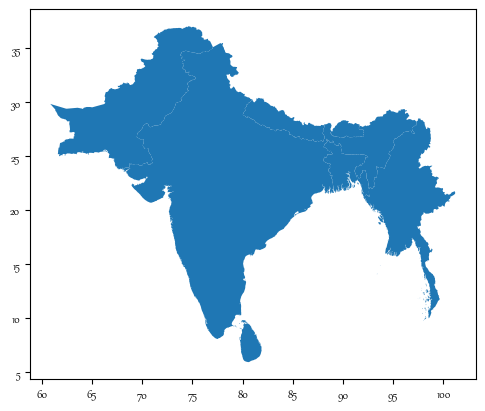

In [2]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
print(df.ADMIN.unique())
sub_cont = df.loc[df['ADMIN'].isin(['Pakistan', 'Bangladesh', 'Myanmar', 'Sri Lanka', 'Bhutan', 'Nepal'])]
mal = df.loc[df['ADMIN'] == 'India']
Polygons = list(mal.iloc[0].geometry)
mal.geometry = [Polygons[0]]

sub_cont = pd.concat([sub_cont, mal])
sub_cont.plot()

In [3]:

asia_rivers = pd.concat([gpd.read_file("../../Nature/rivers/data/rivers/europe/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/asia/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/siberia/a00000009.gdbtable")])

print(asia_rivers)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       20000001          0  20000001       0.69    0.000000         5.6   
1       20000002          0  20000002       4.09    0.000000         7.7   
2       20000003          0  20000003       5.09    0.000000         9.2   
3       20000004          0  20000004       3.95    0.000000         9.8   
4       20000005          0  20000005       1.77    0.000000        12.0   
...          ...        ...       ...        ...         ...         ...   
677760  30677761   30677759  30676509       1.72  167.699997         6.8   
677761  30677762   30677755  30676509       4.58  179.199997        11.1   
677762  30677763   30677759  30676509       5.53  167.699997        12.9   
677763  30677764   30677763  30676509       1.41  173.300003         6.0   
677764  30677765   30677763  30676509       1.38  173.100006         7.5   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \
0       13.

In [4]:
asia_rivers = gpd.sjoin(asia_rivers, sub_cont, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [5]:
asia_rivers = asia_rivers.drop(columns=['index_right'])

In [6]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

asia_lakes = gpd.sjoin(lakes, sub_cont, op='intersects')
asia_lakes = lakes.loc[lakes.index.isin(asia_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(asia_rivers, asia_lakes, op='within')
asia_rivers = asia_rivers.loc[~asia_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [7]:
asia_rivers = asia_rivers.loc[asia_rivers['ORD_FLOW'] < 8]

In [8]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp")])

In [9]:
from shapely.ops import unary_union

geoms = [unary_union(basins.loc[basins['MAJ_NAME'] == poly_basin].geometry.tolist()) for poly_basin in basins.MAJ_NAME.unique().tolist()]
geoms_area = [geom.area for geom in geoms]
names = [poly_basin for poly_basin in basins.MAJ_NAME.unique().tolist()]

In [10]:
new_basins = gpd.GeoDataFrame(pd.DataFrame({"name": names, "area": geoms_area}), geometry=geoms)

In [11]:
new_basins = new_basins.sort_values(["area"], ascending=False)

In [12]:
new_basins = gpd.sjoin(new_basins, sub_cont, op="intersects")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_3696\807363725.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  new_basins = gpd.sjoin(new_basins, sub_cont, op="intersects")


In [13]:
new_basins_copy = new_basins.copy()

In [14]:
print(new_basins_copy.name.unique())

['Tarim Interior' 'Amu Darya' 'Indus' 'Sabarmati' 'Helmand'
 'Arabian Sea Coast' 'Hamun-i-Mashkel' 'Ganges - Bramaputra' 'Irrawaddy'
 'Godavari' 'Krishna' 'Mahandi' 'Narmada'
 'Bay of Bengal, North East Coast' 'India West Coast' 'Cauvery' 'Pennar'
 'Tapti' 'Yasai' 'India East Coast' 'India South Coast' 'Brahamani'
 'India North East Coast' 'Mahi' 'Mekong' 'Peninsula Malaysia' 'Salween'
 'Chao Phraya' 'Sittang' 'Andaman - Nicobar Islands' 'Sri Lanka']


In [15]:
import pandas as pd
import random

colors = {'Tarim Interior': 'black', 
          'Amu Darya': '#ffa500',
          'Indus': '#808000', 
          'Sabarmati': '#483d8b', 
          'Helmand': '#dc143c',
          'Arabian Sea Coast': 'lime', 
          'Hamun-i-Mashkel': 'blue', 
          'Ganges - Bramaputra': 'red', 
          'Irrawaddy': 'darkgreen', 
          'Godavari': '#228B22', 
           'Krishna': '#3cb371', 
          'Mahandi': '#875692', 
          'Narmada': '#2f4f4f', 
          'Bay of Bengal, North East Coast': '#0000ff',
          'India West Coast': '#ff00ff', 
          'Cauvery': '#1e90ff', 
          'Pennar': '#BE0032', 
          'Tapti': '#ff1493',
          'Yasai': '#882D17', 
          'India East Coast': 'black', 
          'India South Coast': 'blue',
          'Brahamani': '#808000', 
          'India North East Coast': '#483d8b', 
          'Mahi': '#dc143c',
          'Mekong': '#000080', 
          'Peninsula Malaysia': 'darkorange', 
          'Salween': '#8b008b', 
          'Chao Phraya': '#ff4500',
          'Sittang': '#8b008b', 
          'Andaman - Nicobar Islands': 'blue',
          'Sri Lanka': '#008856', 
          }

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': 'lime', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'red', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': '#882D17', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': '#ee82ee',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000', 
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': '#8b008b', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'black',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f'}

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})


In [16]:
print(colors_df)

                        basin   colors
0         Siberia, West Coast    black
1                          Ob  #ffa500
2                        Lena  #808000
3                     Yenisey  #483d8b
4        Siberia, North Coast  #dc143c
..                        ...      ...
83                     Hainan  #882D17
84           Baltic Sea Coast  #228B22
85            Sinai Peninsula  #3cb371
86  Andaman - Nicobar Islands  #875692
87                     Taiwan  #2f4f4f

[88 rows x 2 columns]


In [17]:
new_basins_copy = pd.merge(new_basins_copy, colors_df, left_on='name', right_on='basin', how='left')

In [18]:
new_basins_copy = new_basins_copy[['name', 'geometry', 'colors']]

In [19]:
print(new_basins_copy)

                               name  \
0                    Tarim Interior   
1                         Amu Darya   
2                             Indus   
3                         Sabarmati   
4                           Helmand   
5                 Arabian Sea Coast   
6                   Hamun-i-Mashkel   
7                    Tarim Interior   
8               Ganges - Bramaputra   
9                             Indus   
10                        Sabarmati   
11                        Irrawaddy   
12                         Godavari   
13                          Krishna   
14                          Mahandi   
15                          Narmada   
16  Bay of Bengal, North East Coast   
17                 India West Coast   
18                          Cauvery   
19                           Pennar   
20                            Tapti   
21                            Yasai   
22                 India East Coast   
23                India South Coast   
24                       

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(54.319374999998985,
 111.36812499999958,
 -1.0966666666666085,
 48.69666666666575)

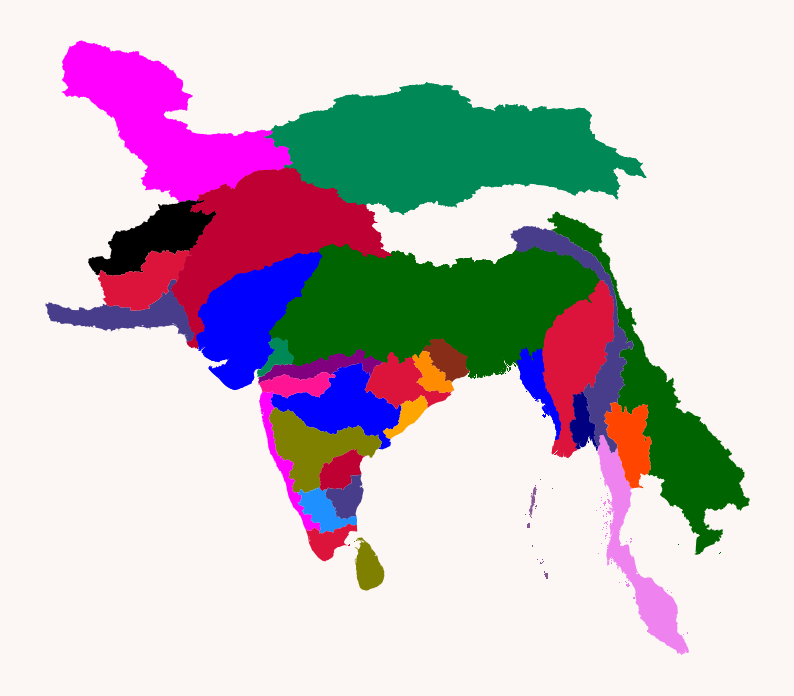

In [20]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
new_basins_copy.plot(ax=ax, column='name', color=new_basins_copy['colors'])
ax.axis('off')

In [21]:
rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_3696\549450257.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')


In [22]:
print(rivers_basins)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM   DIST_DN_KM  DIST_UP_KM  \
761459   20761460   20761720  20767089       5.68  1004.900024   18.500000   
761719   20761720   20761805  20767089       2.54  1002.400024   21.000000   
761804   20761805   20762141  20767089       1.40  1001.000000   22.400000   
762140   20762141   20763190  20767089       2.61   998.400024   25.000000   
763436   20763437   20763347  20767089       2.19   974.700012   59.599998   
...           ...        ...       ...        ...          ...         ...   
1410452  41410453          0  41410453       3.58     0.000000    5.700000   
1410481  41410482   41410526  41410526       2.70     1.300000   74.900002   
1410482  41410483   41410526  41410526       4.30     1.300000    7.400000   
1410525  41410526          0  41410526       1.12     0.000000   76.000000   
1410542  41410543          0  41410543       6.42     0.000000   36.000000   

         CATCH_SKM   UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ...  FC

In [23]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.02, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.02, max_value=0.8)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)

In [24]:
x = unary_union(sub_cont.geometry.tolist())
y = x.boundary
asia = gpd.GeoDataFrame(pd.DataFrame({'name': ['asia']}), crs="EPSG:4326", geometry=[y])

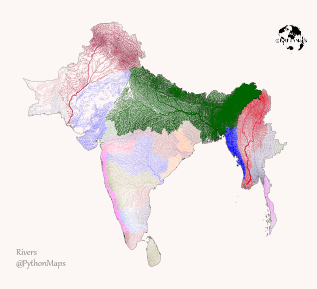

In [25]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIS_AV_CMS'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.63, 0.74, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Rivers \n@PythonMaps",
              size=8,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

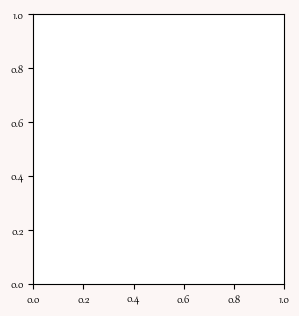

In [26]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.63, 0.74, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Rivers \n@PythonMaps",
              size=8,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia3.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')


ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/sub_continent_print.png", dpi=7500, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')


ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/sub_continent_print_low_res.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
print(rivers_basins)